In [1]:
import wrangle as w
import new_lib as nl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
zil = w.wrangle_zillow()
zil
# Wrangle the data into workable format 

,id,bedrooms,bathrooms,square_footage,lot_size,tax_value,yearbuilt,fips
index,,,,,,,,
0,1727539,4.0,3.5,3100.0,4506.0,1023282.0,1998,6059.0
1,1387261,2.0,1.0,1465.0,12647.0,464000.0,1967,6111.0
2,11677,3.0,2.0,1243.0,8432.0,564778.0,1962,6059.0
3,2288172,4.0,3.0,2376.0,13038.0,145143.0,1970,6037.0
4,781532,4.0,3.0,2962.0,63000.0,773303.0,1950,6037.0
...,...,...,...,...,...,...,...,...
51955,673515,2.0,2.0,1286.0,47405.0,354621.0,1940,6037.0
51956,2968375,4.0,2.0,1612.0,12105.0,67205.0,1964,6111.0
51957,1843709,3.0,1.0,1032.0,5074.0,49546.0,1954,6037.0


In [3]:
zil, fences = nl.remove_outliers(zil)
# Remove any outliers from data

fips column ignored


In [4]:
zil.head()
# Check dataframe

,id,bedrooms,bathrooms,square_footage,lot_size,tax_value,yearbuilt,fips
index,,,,,,,,
0,1727539,4.0,3.5,3100.0,4506.0,1023282.0,1998,6059.0
1,1387261,2.0,1.0,1465.0,12647.0,464000.0,1967,6111.0
2,11677,3.0,2.0,1243.0,8432.0,564778.0,1962,6059.0
3,2288172,4.0,3.0,2376.0,13038.0,145143.0,1970,6037.0
5,870991,2.0,1.0,738.0,4214.0,218552.0,1922,6037.0


In [5]:
zil.info()
# Quick glance at data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42640 entries, 0 to 51959
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              42640 non-null  int64  
 1   bedrooms        42640 non-null  float64
 2   bathrooms       42640 non-null  float64
 3   square_footage  42640 non-null  float64
 4   lot_size        42640 non-null  float64
 5   tax_value       42640 non-null  float64
 6   yearbuilt       42640 non-null  int64  
 7   fips            42640 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 2.9 MB


In [6]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = nl.train_vailidate_test_split(zil, 'tax_value')
# Creating a split for the data

In [7]:
train_scaled, val_scaled, test_scaled = nl.scale_splits(X_train, X_val, X_test, MinMaxScaler(), ['bedrooms', 'bathrooms', 'square_footage', 'lot_size', 'yearbuilt'])
train_scaled.head()
# Scaling data and confirming result

,id,bedrooms,bathrooms,square_footage,lot_size,yearbuilt,fips
index,,,,,,,
18573,2138356,0.333333,0.285714,0.320749,0.429523,0.550459,6037.0
32318,2695053,0.333333,0.285714,0.274198,0.406632,0.513761,6059.0
17200,145241,0.333333,0.285714,0.411581,0.574161,0.486239,6059.0
570,643458,0.000000,0.000000,0.241272,0.370100,0.311927,6037.0
32875,1144215,0.666667,0.428571,0.507806,0.516384,0.495413,6059.0


In [8]:
train_scaled = pd.get_dummies(train_scaled, columns= ['fips'])
train_scaled.head()
# Getting dummies for fips which is the only catagorical variable

,id,bedrooms,bathrooms,square_footage,lot_size,yearbuilt,fips_6037.0,fips_6059.0,fips_6111.0
index,,,,,,,,,
18573,2138356,0.333333,0.285714,0.320749,0.429523,0.550459,1,0,0
32318,2695053,0.333333,0.285714,0.274198,0.406632,0.513761,0,1,0
17200,145241,0.333333,0.285714,0.411581,0.574161,0.486239,0,1,0
570,643458,0.000000,0.000000,0.241272,0.370100,0.311927,1,0,0
32875,1144215,0.666667,0.428571,0.507806,0.516384,0.495413,0,1,0


In [9]:
cont_var = ['bedrooms','bathrooms','square_footage','lot_size','yearbuilt']
# Establishing continuous variables for stats tests

In [10]:
cat_var = zil.fips
target = zil.tax_value
# Other variable types for stats

In [11]:
def select_kbest(X_train, y_train, stat_test, k_value):
    f_selector = SelectKBest(stat_test, k = k_value)
    f_selector.fit(X_train, y_train)
    f_select_mask = f_selector.get_support()
    return X_train.iloc[:,f_select_mask].head()
# k_best test function just too lazy to make another import will be in functions.py as well

In [31]:
f_selector = select_kbest(train_scaled, y_train, f_regression, 3)
f_selector
# Use k_best for 3 variables

,bathrooms,square_footage,yearbuilt
index,,,
18573,0.285714,0.320749,0.550459
32318,0.285714,0.274198,0.513761
17200,0.285714,0.411581,0.486239
570,0.000000,0.241272,0.311927
32875,0.428571,0.507806,0.495413


In [14]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 3)
# setting up rfe

In [32]:
rfe.fit(train_scaled, y_train)
# fitting rfe

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [16]:
ranks = rfe.ranking_
columns = train_scaled.columns.tolist()

In [17]:
feature_ranks = pd.DataFrame({'ranking': ranks, 
                              'feature': columns})

In [18]:
feature_ranks.sort_values('ranking').reset_index().drop(columns = 'index')
# rfe results

,ranking,feature
0,1,fips_6037.0
1,1,fips_6059.0
2,1,fips_6111.0
3,2,square_footage
4,3,bedrooms
5,4,bathrooms
6,5,lot_size
7,6,yearbuilt
8,7,id


In [33]:
for col in cont_var:
    corr, p = stats.pearsonr(train_scaled[col], train['tax_value'])
    print(f'The correlation between {col} and tax_value is: {corr}\n')
    # simple correlation test for all continuous variables

The correlation between bedrooms and tax_value is: 0.1931992929056372

The correlation between bathrooms and tax_value is: 0.3860403945223849

The correlation between square_footage and tax_value is: 0.46371139334393335

The correlation between lot_size and tax_value is: 0.047632575326018514

The correlation between yearbuilt and tax_value is: 0.23784379443175432



### square_footage is the best driver followed by bathrooms and yearbuilt

Text(0.5, 1.0, 'Home Value by Bedroom Number')

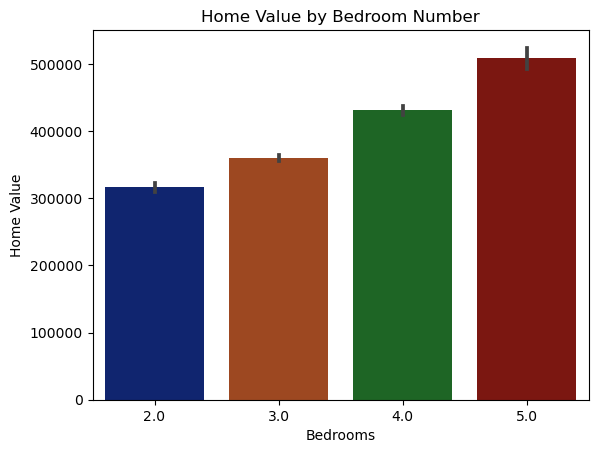

In [34]:
sns.barplot(x='bedrooms', y='tax_value', data= train, palette = 'dark')
plt.xlabel('Bedrooms')
plt.ylabel('Home Value')
plt.title('Home Value by Bedroom Number')

### Unsurprisngly, as bedroom count increases value tends to increase as well

Text(0.5, 1.0, 'Property Value by Number of Bathrooms')

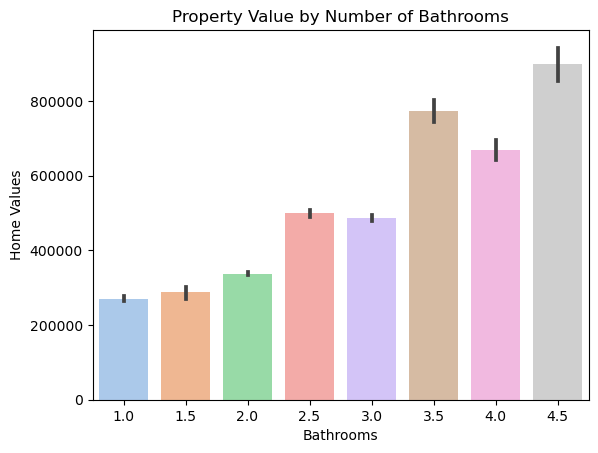

In [35]:
sns.barplot(x='bathrooms', y='tax_value', data=train, palette = 'pastel')
plt.xlabel('Bathrooms')
plt.ylabel('Home Values')
plt.title('Property Value by Number of Bathrooms')

### The trend is generally positive however there is an interesting dip at 3 and 4 which could be due to location or other variables
### It would take more time to dive into the reason behind it

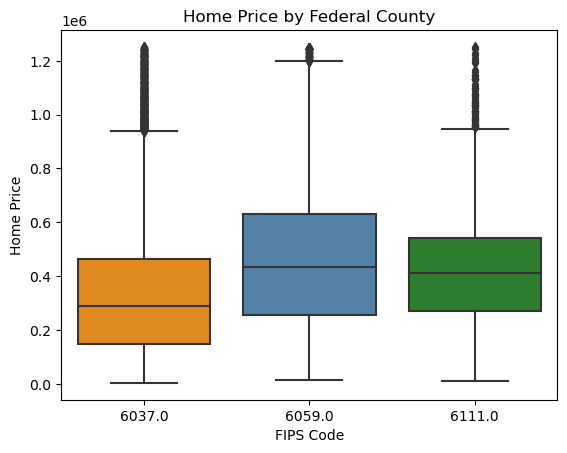

In [36]:
sns.boxplot(x='fips', y='tax_value',data=zil, palette = ['darkorange', 'steelblue', 'forestgreen'])
plt.xlabel('FIPS Code')
plt.ylabel('Home Price')
plt.title('Home Price by Federal County')
plt.show()
# Finding home price by county and comparing them

### Fips 6059 has the highest average home prices

In [37]:
la = train[train['fips']==6037]['tax_value']
orange = train[train['fips']==6059]['tax_value']
ventura = train[train['fips']==6111]['tax_value']
# Found the county name for each fips id and now want to look at the distribution of the fips home values

<AxesSubplot:>

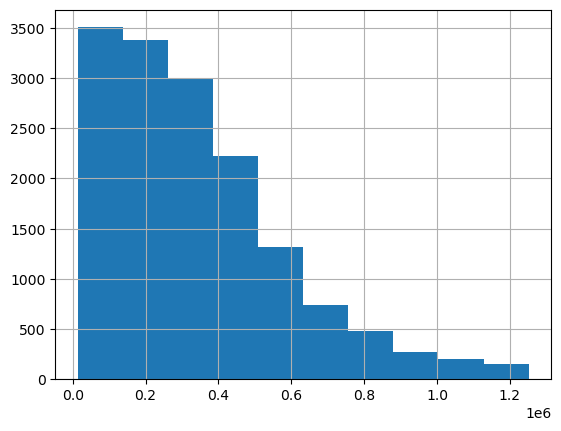

In [38]:
la.hist()

<AxesSubplot:>

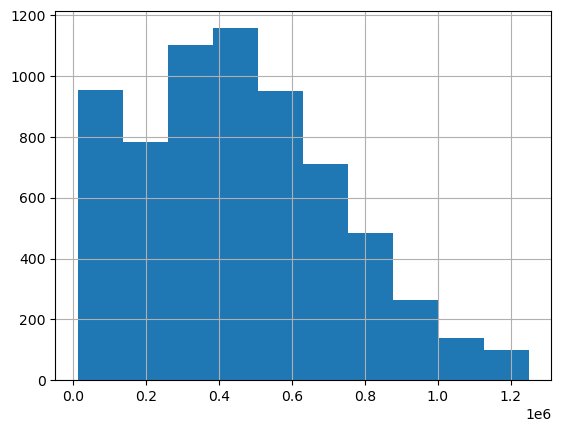

In [39]:
orange.hist()

<AxesSubplot:>

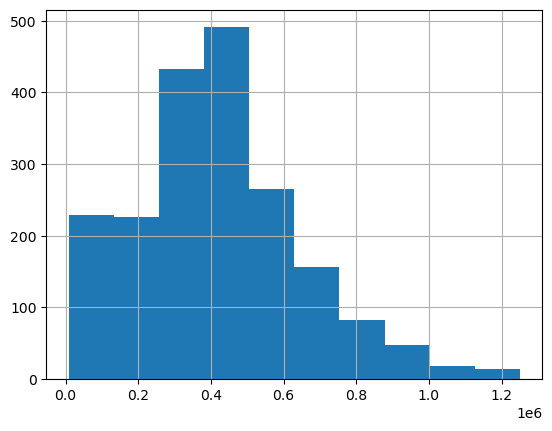

In [40]:
ventura.hist()

#### We clearly can see that the average price throughout the counties is different with orange being the highest

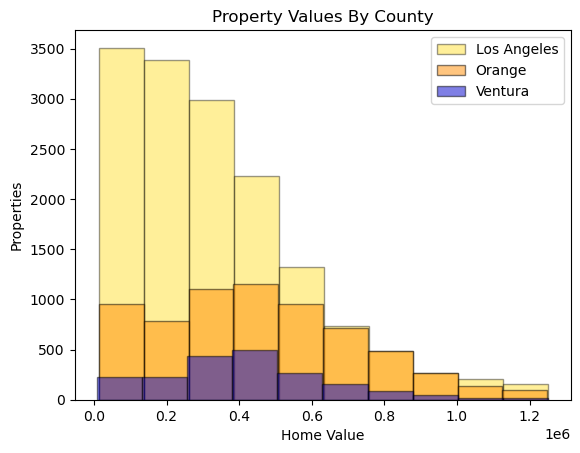

In [42]:
plt.hist(x = la, color = 'gold', alpha = .4, edgecolor = 'black', label = 'Los Angeles')
plt.hist(x = orange, color = 'darkorange', alpha = .5, edgecolor = 'black', label = 'Orange')
plt.hist(x = ventura, color = 'mediumblue', alpha = .5, edgecolor = 'black', label = 'Ventura')
plt.xlabel('Home Value')
plt.ylabel('Properties')
plt.title('Property Values By County')
plt.legend()
plt.show()
# Layering previous histograms to get a better image of average home value

### Histograms overlayed to get a better sense of the values of homes in each county

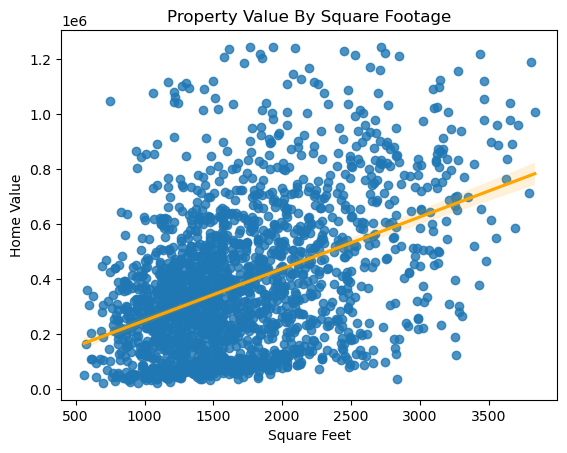

In [43]:
sns.regplot(x='square_footage', y='tax_value', data=train.sample(2000), line_kws={'color':'orange'})
plt.xlabel('Square Feet')
plt.ylabel('Home Value')
plt.title('Property Value By Square Footage')
plt.show()
# creating a regplot to show a regression line through a sample of 2000 to visualize relationship

### While there is correlation there seems to be a significant amount of variablity

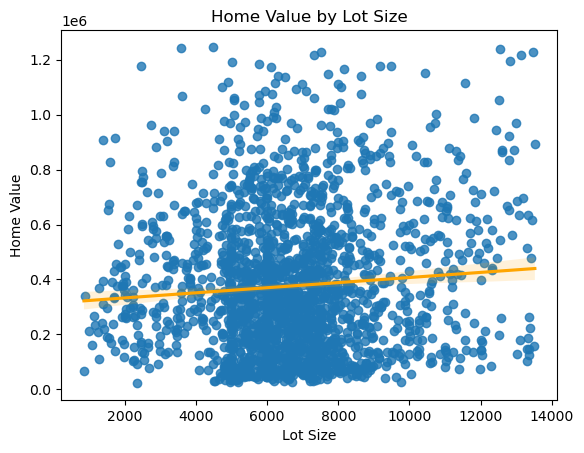

In [29]:
sns.regplot(x='lot_size', y='tax_value', data=train.sample(2000),line_kws={'color':'orange'})
plt.xlabel('Lot Size')
plt.ylabel('Home Value')
plt.title('Home Value by Lot Size')
plt.show()

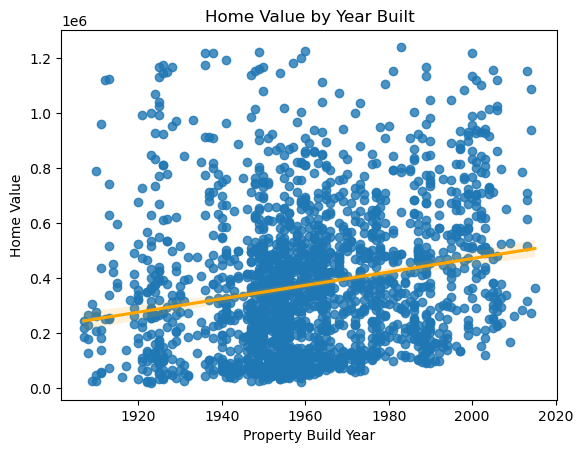

In [30]:
sns.regplot(x='yearbuilt', y='tax_value', data=train.sample(2000), line_kws={'color':'orange'})
plt.xlabel('Property Build Year')
plt.ylabel('Home Value')
plt.title('Home Value by Year Built')
plt.show()